# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

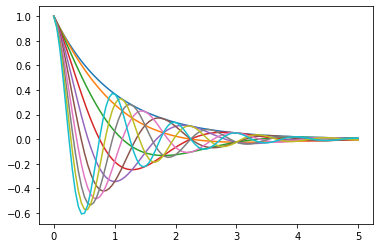

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

ax = plt.subplot(1, 1, 1)
theta = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 100)
for num in theta:
    y=np.cos(np.pi*x*num)*np.exp(-x)
    ax.plot(x,y)

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

Text(0, 0.5, 'Double faults per match')

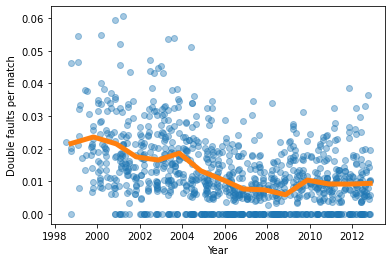

In [3]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

t = pd.read_csv("data/tennis.csv")
fig, ax = plt.subplots(1, 1)
t['dm'] = t["player1 double faults"]/t["player1 total points total"]
year_groupby1 = t.groupby('year')['start date'].max()
year_groupby2 = t.groupby('year')['dm'].mean()
ax.plot_date(pd.to_datetime(t['start date']), t['dm'],alpha = 0.4)
ax.plot_date(pd.to_datetime(year_groupby1), year_groupby2, '-',lw=5)
plt.xlabel('Year')
plt.ylabel('Double faults per match')

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [4]:
import datetime as dt
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

Text(0, 0.5, 'Percentage Change in Price')

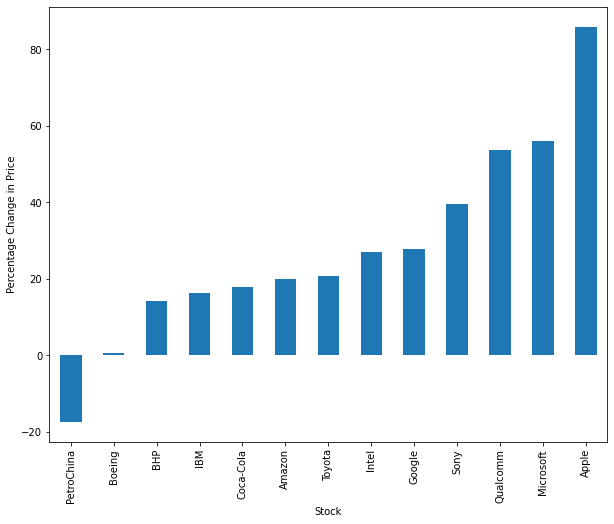

In [6]:
df = pd.DataFrame(ticker)
df = df.rename(columns=ticker_list)
#Extracting first and last row
first = df.iloc[0]
last = df.iloc[-1]

percentage=(last-first)/first*100
percentage = percentage.sort_values()

fig, ax = plt.subplots(figsize=(10,8))
percentage.plot(kind='bar', ax=ax)

plt.xlabel('Stock')
plt.ylabel('Percentage Change in Price')

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [5]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

YrToYr = read_data(indices_list, start = dt.datetime(1970, 1, 2), end = dt.datetime(2020, 12, 31))
#print(YrToYr)
YrToYr1 = read_data(indices_list, start = dt.datetime(1970, 1, 2), end = dt.datetime(2020, 12, 31))
print(YrToYr1)

                  ^GSPC         ^IXIC          ^DJI         ^N225
Date                                                             
1970-01-02    93.000000           NaN           NaN           NaN
1970-01-05    93.459999           NaN           NaN   2402.850098
1970-01-06    92.820000           NaN           NaN   2406.219971
1970-01-07    92.629997           NaN           NaN   2394.959961
1970-01-08    92.680000           NaN           NaN   2283.679932
...                 ...           ...           ...           ...
2020-12-07  3691.959961  12519.950195  30069.789062  26547.439453
2020-12-08  3702.250000  12582.769531  30173.880859  26467.080078
2020-12-09  3672.820068  12338.950195  30068.810547  26817.939453
2020-12-10  3668.100098  12405.809570  29999.259766  26756.240234
2020-12-11  3663.459961  12377.872070  30046.369141  26652.519531

[12853 rows x 4 columns]


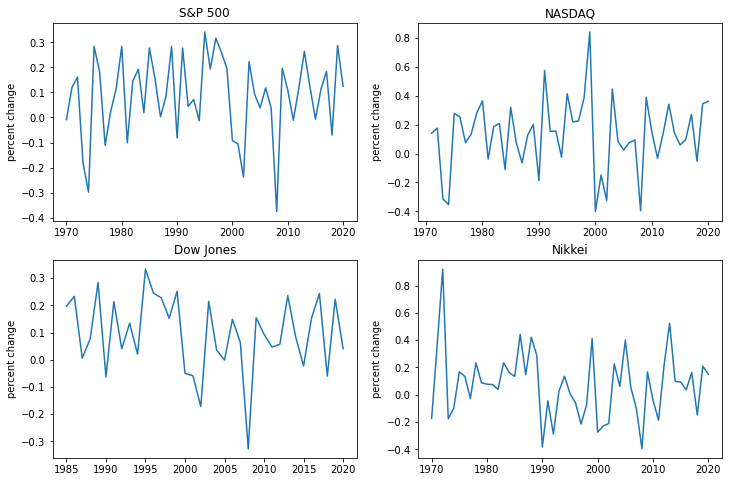

In [6]:
new_df=pd.DataFrame()

for index,data in YrToYr.items():
    lastDayOfYear = YrToYr.groupby(YrToYr.index.year)[index].last()
    firstDayOfYear = YrToYr.groupby(YrToYr.index.year)[index].first()
    percent = (lastDayOfYear-firstDayOfYear)/firstDayOfYear
    new_df[index] = percent
    

figure,axes = plt.subplots(2,2,figsize=(12,8))
for i_,ax in enumerate(axes.flatten()):
    new_df.columns = indices_list
    name = new_df.columns[i_]
    ax.title.set_text(indices_list[name])
    ax.plot(new_df[name])
    ax.set_ylabel("percent change")


# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

[Text(0.5, 1.0, 'Outdoor: Clay')]

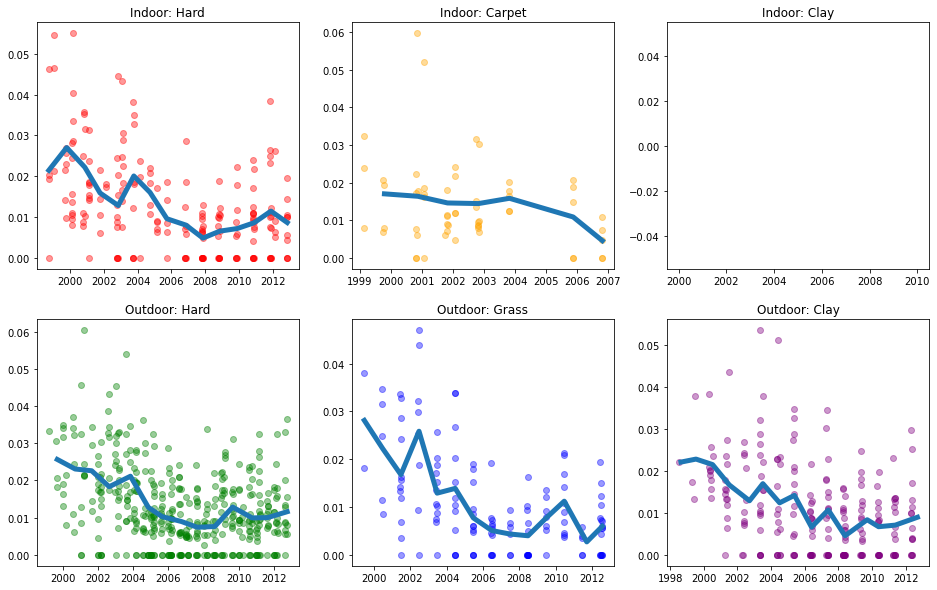

In [9]:
table_1=t[t["surface"] == 'Indoor: Hard']
#print(table_1)
table_2=t[t["surface"] == 'Indoor: Carpet']
#print(table_2)
table_3=t[t["surface"] == 'Indoor: Clay']
#print(table_3)
table_4=t[t["surface"] == 'Outdoor: Hard']
#print(table_4)
table_5=t[t["surface"] == 'Outdoor: Grass']
#print(table_5)
table_6=t[t["surface"] == 'Outdoor: Clay']
#print(table_6)
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(16,10))

ax1.plot_date(pd.to_datetime(table_1['start date']), table_1['dm'],alpha = 0.4,color='red')
year_groupby1 = table_1.groupby('year')['start date'].max()
year_groupby2 = table_1.groupby('year')['dm'].mean()
ax1.plot_date(pd.to_datetime(year_groupby1), year_groupby2, '-',lw=5)
ax1.set(title = 'Indoor: Hard')

ax2.plot_date(pd.to_datetime(table_2['start date']), table_2['dm'],alpha = 0.4,color='orange')
year_groupby1 = table_2.groupby('year')['start date'].max()
year_groupby2 = table_2.groupby('year')['dm'].mean()
ax2.plot_date(pd.to_datetime(year_groupby1), year_groupby2, '-',lw=5)
ax2.set(title = 'Indoor: Carpet')

ax3.plot_date(pd.to_datetime(table_3['start date']), table_3['dm'],alpha = 0.4,color='yellow')
year_groupby1 = table_3.groupby('year')['start date'].max()
year_groupby2 = table_3.groupby('year')['dm'].mean()
ax3.plot_date(pd.to_datetime(year_groupby1), year_groupby2, '-',lw=5)
ax3.set(title = 'Indoor: Clay')

ax4.plot_date(pd.to_datetime(table_4['start date']), table_4['dm'],alpha = 0.4,color='green')
year_groupby1 = table_4.groupby('year')['start date'].max()
year_groupby2 = table_4.groupby('year')['dm'].mean()
ax4.plot_date(pd.to_datetime(year_groupby1), year_groupby2, '-',lw=5)
ax4.set(title = 'Outdoor: Hard')

ax5.plot_date(pd.to_datetime(table_5['start date']), table_5['dm'],alpha = 0.4,color='blue')
year_groupby1 = table_5.groupby('year')['start date'].max()
year_groupby2 = table_5.groupby('year')['dm'].mean()
ax5.plot_date(pd.to_datetime(year_groupby1), year_groupby2, '-',lw=5)
ax5.set(title = 'Outdoor: Grass')

ax6.plot_date(pd.to_datetime(table_6['start date']), table_6['dm'],alpha = 0.4,color='purple')
year_groupby1 = table_6.groupby('year')['start date'].max()
year_groupby2 = table_6.groupby('year')['dm'].mean()
ax6.plot_date(pd.to_datetime(year_groupby1), year_groupby2, '-',lw=5)
ax6.set(title = 'Outdoor: Clay')

